# DATA NORMALIZATION

## Theory

Various factors affect transcript quantification in RNA-seq data, such as sequencing depth, transcript length, and sample-to-sample and batch-to-batch variability. Normalization methods exist to minimize these variables and ensure reliable transcriptomic data. Sequencing technologies introduce technical variability. Therefore, raw transcriptomic data must be adjusted to account for these technical factors. 

It is essential to choose the correct RNA-seq normalization method for the dataset and there are three main RNA-seq normalization stages to consider:
 1. **Within sample**: Within sample normalization is required to compare the expression of genes within an individual sample. It can adjust data for two primary technical variables: transcript length and sequencing depth. Longer genes often have more mapped reads than shorter genes at the same expression level. Therefore, their expression level can only be accurately compared within a sample after normalization. Furthermore, the number of sequencing reads per sample may vary. This can also be corrected by within sample normalization. Within sample normalization is not sufficient to compare gene expression between samples. For this, between sample RNA-seq normalization methods are required. Within sample normalization most common techniques are:
    - **CPM**: Counts per million (CPM) mapped reads are the number of raw reads mapped to a transcript, scaled by the number of sequencing reads in your sample, multiplied by a million. It normalizes RNA-seq data for sequencing depth but not gene length. Therefore, although it is a within sample normalization approach, CPM normalization is unsuitable for within sample comparisons of gene expression. Between sample comparisons can be made when CPM is used alongside ‘within a dataset’ normalization methods.
    - **FPKM/RPKM**: FPKM (fragments per kilobase of transcript per million fragments mapped) for paired-end data and RPKM (reads per kilobase of transcript per million reads mapped) for single-end data correct for variations in library size and gene length. One issue with FPKM/RPKM units is that the expression of a gene in one sample will appear different from its expression in another sample, even when its true expression level is the same. This is because it depends on the relative abundance of a transcript among a population of sequenced transcripts. FPKM/RPKM units best compare gene expression within a single sample
    - **TPM**: Transcripts per million (TPM) represents the relative number of transcripts you would detect for a gene if you had sequenced one million full-length transcripts. It is calculated by dividing the number of reads mapped to a transcript by the transcript length. This value is then divided by the sum of mapped reads to all transcripts after normalization for transcript length. It is then multiplied by one million to allow easier further analyses. It normalizes RNA-seq data for sequencing depth and transcript length. TPM and FPKM/RPKM are closely related, however, in contrast to FPKM/RPKM, there is limited variation in values between samples as the sum of all TPMs in each sample is the same. TPM can be used for within sample comparisons but requires ‘within a dataset’ normalization for between sample comparisons.

 2. **Within a dataset (between samples)**: Samples within a dataset can be simultaneously normalized as a complete set to adjust for different technical variations such as sequencing depth. RNA-seq is a relative, not an absolute, measure of transcript abundance. This means that the transcript population as a whole affects relative levels of transcripts. This creates biases for gene expression analyses, and these are minimized by between sample RNA-seq normalization methods. Within a dataset normalization mosto common techniques are:
    - **Quantile**: The quantile method aims to make the distribution of gene expression levels the same for each sample in a dataset. It assumes that the global differences in distributions between samples are all due to technical variation. Any remaining differences are likely actual biological effects. For each sample, genes are ranked based on their expression level. An average value is calculated across all samples for genes of the same rank. This average value then replaces the original value of all genes in that rank. These genes are then placed in their original order.
    - **TMM**: TMM (trimmed mean of M-values) also assumes that most genes are not differentially expressed between samples. If many genes are uniquely or highly expressed in one experimental condition, it will affect the accurate quantification of the remaining genes. To adjust for this possibility, TMM calculates scaling factors to adjust library sizes for the normalization of samples within a dataset. To do this, one sample is chosen as a reference sample. The fold changes and absolute expression levels of other samples within the dataset are then calculated relative to the reference sample. Next, the genes in the data set are ‘trimmed’ to remove differentially expressed genes using these two values. The trimmed mean of the fold changes is then found for each sample. Finally, read counts are scaled by this trimmed mean and the total count of their sample.

 3. **Across datasets**: Researchers often integrate RNA-seq data from multiple independent studies. These datasets are usually sequenced at different times, with varying methods across multiple facilities, and contain other experimental variables. This results in a batch effect. The batch effect is often responsible for the greatest source of differential expression when data is combined. It can mask any true biological differences and lead to incorrect conclusions. RNA-seq normalization across datasets can correct for known variables across batches, such as the sequencing center and date of sequencing, as well as unknown variables.

source : https://bigomics.ch/blog/why-how-normalize-rna-seq-data/


**PERSONAL CONSIDERATIONS**

Since we want to have a model capable of inferring the survivability of a patient given a feature vector, we thought that the model would need, to behave at best, data normalized across the dataset allowing intra-dataset comparisons in order to learn when a feature vector corresponds to higher or lower survivability. Given this preposition we first normalize miRNA read values with the TMM method to allow genetic intra-dataset comparisons, and then normalize all values of the feature vectors.

## Init

In [ ]:
%pip install rnanorm

In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
base = os.path.basename(os.getcwd())
list = os.getcwd().split(os.sep) 
list.pop(list.index(base))
ROOT = '\\'.join(list)
print(ROOT)
DATA_PATH = os.path.join(ROOT, 'datasets\\preprocessed')
miRNA_file = 'clinical_miRNA(RC_RPM).csv'

d:\Universita\2 anno magistrale\Progetto BioInf\miRNA_to_age


In [4]:
miRNA_dataset = os.path.join(DATA_PATH, miRNA_file)
miRNA_dataset

'd:\\Universita\\2 anno magistrale\\Progetto BioInf\\miRNA_to_age\\datasets\\preprocessed\\clinical_miRNA(RC_RPM).csv'

In [5]:
data = pd.read_csv(miRNA_dataset)
# print(data.shape)
# print(data.head())
print([col for col in data.columns if 'read' in col])

['read_count', 'reads_per_million_miRNA_mapped']


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# print(data.shape)

# tmp = data.drop(columns=['radiation_therapy', 'case_id'])
# print(tmp.shape)
# tmp = tmp.dropna(subset=['pathologic_stage'])
# print(tmp.shape)

# pathologic_stage = tmp[['pathologic_stage']]

# encoder = OneHotEncoder()
# encoded_stages = encoder.fit_transform(pathologic_stage).toarray()
# encoded_columns = encoder.get_feature_names_out(['pathologic_stage'])

# encoded_df = pd.DataFrame(encoded_stages, columns=encoded_columns, index=pathologic_stage.index)

# tmp = pd.concat([tmp, encoded_df], axis=1)
# tmp = tmp.drop(columns=['pathologic_stage'])

# print(tmp.shape)
# print(tmp.head())

# tmp.to_csv(os.path.join(DATA_PATH, 'clinical_miRNA.csv'), index=False)

(767, 8)
(767, 6)
(760, 6)
(760, 16)
   days_to_death  age_at_initial_pathologic_diagnosis  days_to_last_followup  \
0           -1.0                                   71                 1918.0   
1           -1.0                                   53                 1309.0   
2           -1.0                                   55                    0.0   
3           -1.0                                   64                  212.0   
4         2763.0                                   46                 2763.0   

   Death                                         read_count  \
0      0  [13756, 13807, 13949, 55698, 5797, 518, 3747, ...   
1      0  [37711, 37303, 37662, 44231, 14405, 1889, 3169...   
2      0  [10731, 10926, 10792, 14125, 2622, 462, 698, 3...   
3      0  [70280, 70637, 70972, 67833, 5167, 1629, 18954...   
4      1  [12807, 12718, 13064, 26120, 4490, 1775, 11051...   

   pathologic_stage_Stage I  pathologic_stage_Stage IA  \
0                       0.0                  

## Data preparation

creation of file with all miRNA base names

In [5]:
if os.path.exists(os.path.join(DATA_PATH, 'genes_names.txt')):
    with open(os.path.join(DATA_PATH, 'genes_names.txt'), 'r') as f: 
        lines = f.readlines()
        genes_names = [line.strip() for line in lines]
else:
    genes_names = []
    #path = 'D:\\Universita\\2 anno magistrale\\Progetto BioInf\\miRNA_to_age\\datasets\\miRNA_seq\\0b64742b-b99d-4fc1-bfbf-bb7074f21a67\\9293a93f-b3d1-41ab-8c18-3deed4cc776d.mirbase21.mirnas.quantification.txt'
    path = '../datasets/miRNA_seq/0b64742b-b99d-4fc1-bfbf-bb7074f21a67/9293a93f-b3d1-41ab-8c18-3deed4cc776d.mirbase21.mirnas.quantification.txt'
    with open(path, 'r') as f: 
        lines = f.readlines()[1:]
        for l in lines:
            genes_names.append(l.split('\t')[0])

    with open(os.path.join(DATA_PATH, 'genes_names.txt'), 'w') as f:
        for name in genes_names:
            f.write(name + '\n') 

extraction of miRNA_reads and adjustment into dataframe with each column being a gene

In [102]:
def parse_array(x):
    if isinstance(x, str):
        x = x.strip("[]")
        return np.array([float(i) for i in x.split(",")])
    
    return np.array(x)

if os.path.exists(os.path.join(DATA_PATH, 'genes_reads.csv')):
    genes_reads = pd.read_csv(os.path.join(DATA_PATH, 'genes_reads(RPM).csv'), index_col=0)
    print(genes_reads.head())

else:
    n_cols = len(data["reads_per_million_miRNA_mapped"][0].strip("[]").split(","))
    reads = data["reads_per_million_miRNA_mapped"].apply(parse_array)

    genes_reads = pd.DataFrame(
        np.stack(reads.values),  # Converte la Series di vettori in un array 2D
        index=[f'Sample_{i}' for i in data.index]
    )

    genes_reads.columns = genes_names

    genes_reads.to_csv(os.path.join(DATA_PATH, 'genes_reads.csv'))
    print(genes_reads.head())

print(genes_reads.shape)

          hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3    hsa-let-7b   hsa-let-7c  \
Sample_0   7988.580442   8018.197889   8100.662153  32345.736656  3366.516489   
Sample_1  11857.268807  11728.983540  11841.861998  13907.317668  4529.287401   
Sample_2   7918.388430   8062.278630   7963.400236  10422.815821  1934.769776   
Sample_3  14251.643715  14324.037522  14391.970087  13755.431817  1047.783766   
Sample_4   4818.534597   4785.049036   4915.228857   9827.447776  1689.327738   

          hsa-let-7d   hsa-let-7e  hsa-let-7f-1  hsa-let-7f-2  hsa-let-7g  \
Sample_0  300.820345  2176.011262   2434.438006   2446.052691  184.673494   
Sample_1  593.948205   996.411786   8635.673617   8693.842181  608.411740   
Sample_2  340.909091   515.053129   2789.256198   2791.469894  323.199528   
Sample_3  330.334770  3843.563673   6485.836263   6573.033286  412.867766   
Sample_4  667.830008  4157.853192   1991.450271   2011.014868  780.702685   

          ...  hsa-mir-941-5  hsa-mir-942  hsa-mir

### Extraction from web and manual dictionary of the corresponendce between miRNA base names and gene_id and gene_name

In [84]:
if os.path.exists(os.path.join(DATA_PATH, 'gene_lengths.csv')):
    gene_lengths_df = pd.read_csv(os.path.join(DATA_PATH, 'gene_lengths.csv'), sep="\t", index_col=0)
    print(gene_lengths_df.head())

              gene_length
gene_id                  
hsa-let-7a-1           80
hsa-let-7a-2           72
hsa-let-7a-3           74
hsa-let-7b             83
hsa-let-7c             84


In [12]:
from pybiomart import Server

server = Server(host='http://www.ensembl.org')
mart = server['ENSEMBL_MART_ENSEMBL']
dataset = mart['hsapiens_gene_ensembl']

# Query con filtro sui geni miRNA
miRNA_mapping = dataset.query(
    attributes=['ensembl_gene_id', 'external_gene_name', 'mirbase_id'],
    filters={'biotype': 'miRNA'}  # filtra solo i miRNA
)

print(miRNA_mapping.head())
miRNA_mapping.shape

    Gene stable ID  Gene name      miRBase ID
0  ENSG00000283344  MIR1244-4  hsa-mir-1244-1
1  ENSG00000283344  MIR1244-4  hsa-mir-1244-2
2  ENSG00000283344  MIR1244-4  hsa-mir-1244-3
3  ENSG00000283344  MIR1244-4  hsa-mir-1244-4
4  ENSG00000292346    MIR6089  hsa-mir-6089-1


(2170, 3)

In [13]:
server = Server(host='http://grch37.ensembl.org')
mart = server['ENSEMBL_MART_ENSEMBL']
dataset = mart['hsapiens_gene_ensembl']

mapping_grch37 = dataset.query(
    attributes=['ensembl_gene_id', 'external_gene_name', 'mirbase_id'],
    filters={'biotype': 'miRNA'}
)
miRNA_mapping_grch37 = mapping_grch37[mapping_grch37['miRBase ID'].notnull()].drop_duplicates()

print(miRNA_mapping_grch37.head())
miRNA_mapping_grch37.shape

     Gene stable ID Gene name    miRBase ID
2   ENSG00000252695   MIR2276  hsa-mir-2276
5   ENSG00000263399   MIR3170  hsa-mir-3170
7   ENSG00000207719    MIR623   hsa-mir-623
9   ENSG00000263615   MIR4306  hsa-mir-4306
12  ENSG00000265164   MIR2681  hsa-mir-2681


(1601, 3)

In [14]:
gencode_miRNA = pd.read_csv(os.path.join(DATA_PATH, 'miRNA_gtf.csv'))
gencode_miRNA.head()

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,exon_number,exon_id,transcript_support_level,havana_transcript,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl
0,chr1,ENSEMBL,gene,17369,17436,.,-,.,ENSG00000278267.1,miRNA,...,NaN,NaN,NaN,NaN,HGNC:50039,NaN,NaN,NaN,NaN,NaN
1,chr1,ENSEMBL,transcript,17369,17436,.,-,.,ENSG00000278267.1,miRNA,...,NaN,NaN,NaN,NaN,HGNC:50039,NaN,NaN,NaN,NaN,NaN
2,chr1,ENSEMBL,exon,17369,17436,.,-,.,ENSG00000278267.1,miRNA,...,1.0,ENSE00003746039.1,NaN,NaN,HGNC:50039,NaN,NaN,NaN,NaN,NaN
3,chr1,ENSEMBL,gene,30366,30503,.,+,.,ENSG00000284332.1,miRNA,...,NaN,NaN,NaN,NaN,HGNC:35294,NaN,NaN,NaN,NaN,NaN
4,chr1,ENSEMBL,transcript,30366,30503,.,+,.,ENSG00000284332.1,miRNA,...,NaN,NaN,NaN,NaN,HGNC:35294,NaN,NaN,NaN,NaN,NaN


In [ ]:
manual_mapping = {
    "hsa-mir-3607": "MIR3607",
    "hsa-mir-3653": "MIR3653",
    "hsa-mir-3687-1": "MIR3687-1",
    "hsa-mir-3687-2": "MIR3687-2",
    "hsa-mir-6087": "MIR6087",
    "hsa-mir-6723": "MIR6723",
    "hsa-mir-6827": "MIR6827",
    "hsa-mir-7641-1": "MIR7641-1",
    "hsa-mir-7641-2": "MIR7641-2",
    "hsa-mir-3656": "MIR3656",
    "hsa-mir-4788": "MIR4788"
}

gene_lengths = {}
for name in genes_names:
    gene_id_value = None
    if name in manual_mapping:
        gene_id_value = manual_mapping[name]
    else:
        map = miRNA_mapping[miRNA_mapping.astype(str).apply(lambda x: x.str.contains(name, case=False, na=False)).any(axis=1)]
        if map.empty:
            map = miRNA_mapping_grch37[miRNA_mapping_grch37.astype(str).apply(lambda x: x.str.contains(name, case=False, na=False)).any(axis=1)]
        if map.empty:
            print(f"Gene not found for miRBase ID: {name}")
            continue            
        gene_id_value = map['Gene name'].iloc[0] if not map['Gene name'].empty else None
    
    result = pd.DataFrame()
    if gene_id_value:
        result = gencode_miRNA[gencode_miRNA.astype(str).apply(lambda x: x.str.contains(gene_id_value, case=False, na=False)).any(axis=1)]
    
    if result.empty:
        # Result is empty, trying with Gene stable ID
        gene_stable_id = map['Gene stable ID'].iloc[0]
        result = gencode_miRNA[gencode_miRNA.astype(str).apply(lambda x: x.str.contains(gene_stable_id, case=False, na=False)).any(axis=1)]
        
        if result.empty:
            print(f"Gene not found for miRBase ID: {name} using both Gene name and Gene stable ID")
            continue
      
    gene_lengths[name] = int(result['end'].values[0]) - int(result['start'].values[0]) + 1

gene_lengths_df = pd.DataFrame([
    {'gene_id': name, 'gene_length': length}
    for name, length in gene_lengths.items()
])

print(gene_lengths_df.head())
print(gene_lengths_df.shape)
print(gene_lengths_df.isna().sum())
gene_lengths_df.to_csv("gene_lengths.csv", sep="\t", index=False)

KeyboardInterrupt: 

The manual mapping was made consulting the miRBase database at https://www.mirbase.org/ .

### Quantile normalization

In [103]:
import qnorm

reads = genes_reads
print(reads.iloc[:5, :5])

# controlla somma per riga di genes_reads che siano tutti valori più o meno in stesso range(istogramma), in caso contrario normalizza per portare tutti valori su stessa scala, prima di applicare log2
# divided

# Log2 transform necessary for 0 values before quantile normalization
reads_logged = reads.applymap(lambda x: np.log2(float(x) + 1e-3))
print(reads_logged.iloc[:5, :5])

# Quantile normalization
quant_norm = qnorm.quantile_normalize(reads_logged)
print(quant_norm.iloc[:5, :5])
print(quant_norm.shape)

          hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3    hsa-let-7b   hsa-let-7c
Sample_0   7988.580442   8018.197889   8100.662153  32345.736656  3366.516489
Sample_1  11857.268807  11728.983540  11841.861998  13907.317668  4529.287401
Sample_2   7918.388430   8062.278630   7963.400236  10422.815821  1934.769776
Sample_3  14251.643715  14324.037522  14391.970087  13755.431817  1047.783766
Sample_4   4818.534597   4785.049036   4915.228857   9827.447776  1689.327738


C:\Users\Matteo Bulgarelli\AppData\Local\Temp\ipykernel_16512\405099193.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reads_logged = reads.applymap(lambda x: np.log2(float(x) + 1e-3))


          hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3  hsa-let-7b  hsa-let-7c
Sample_0     12.963724     12.969062     12.983824   14.981288   11.717041
Sample_1     13.533484     13.517790     13.531608   13.763557   12.145069
Sample_2     12.950991     12.976972     12.959169   13.347458   10.917947
Sample_3     13.798841     13.806151     13.812977   13.747714   10.033127
Sample_4     12.234379     12.224318     12.263043   13.262601   10.722234
          hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3  hsa-let-7b  hsa-let-7c
Sample_0     -6.694683     -6.676626     -6.676626   -5.577595   -4.777027
Sample_1     -5.360096     -5.376686     -5.363344   -7.196533   -3.338241
Sample_2     -6.719724     -6.643144     -6.714439   -7.590528   -6.271305
Sample_3     -4.654815     -4.649421     -4.649421   -7.216270   -7.202924
Sample_4     -7.648465     -7.654924     -7.648465   -7.627399   -6.623912
(760, 1881)


### Creation of normalized file with just log2

In [ ]:
if os.path.exists(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_log.csv')):
    dataset = pd.read_csv(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_log.csv'))

else:
    dataset = pd.read_csv(os.path.join(DATA_PATH, 'clinical_miRNA(RC_RPM).csv'))
    dataset.drop(columns=['read_count', 'reads_per_million_miRNA_mapped'], inplace=True)
    reads_logged.index = dataset.index
    dataset = pd.concat([dataset, reads_logged], axis=1)
    dataset.to_csv(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_log.csv'), index=False)

print(dataset.head())
print(dataset.shape)
    

['days_to_death', 'age_at_initial_pathologic_diagnosis', 'days_to_last_followup', 'Death', 'pathologic_stage_Stage I', 'pathologic_stage_Stage IA', 'pathologic_stage_Stage IB', 'pathologic_stage_Stage II', 'pathologic_stage_Stage IIA', 'pathologic_stage_Stage IIB', 'pathologic_stage_Stage IIIA', 'pathologic_stage_Stage IIIB', 'pathologic_stage_Stage IIIC', 'pathologic_stage_Stage IV', 'pathologic_stage_Stage X']
   days_to_death  age_at_initial_pathologic_diagnosis  days_to_last_followup  \
0           -1.0                                   71                 1918.0   
1           -1.0                                   53                 1309.0   
2           -1.0                                   55                    0.0   
3           -1.0                                   64                  212.0   
4         2763.0                                   46                 2763.0   

   Death  pathologic_stage_Stage I  pathologic_stage_Stage IA  \
0      0                       0.0    

### Creation of normalized file with also quantile norm

In [112]:
if os.path.exists(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_quant.csv')):
    dataset = pd.read_csv(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_quant.csv'))

else:
    dataset = pd.read_csv(os.path.join(DATA_PATH, 'clinical_miRNA(RC_RPM).csv'))
    dataset.drop(columns=['read_count', 'reads_per_million_miRNA_mapped'], inplace=True)
    quant_norm.index = dataset.index
    dataset = pd.concat([dataset, quant_norm], axis=1)
    dataset.to_csv(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_quant.csv'), index=False)

print(dataset.head())
print(dataset.shape)

   days_to_death  age_at_initial_pathologic_diagnosis  days_to_last_followup  \
0           -1.0                                   71                 1918.0   
1           -1.0                                   53                 1309.0   
2           -1.0                                   55                    0.0   
3           -1.0                                   64                  212.0   
4         2763.0                                   46                 2763.0   

   Death  pathologic_stage_Stage I  pathologic_stage_Stage IA  \
0      0                       0.0                        0.0   
1      0                       1.0                        0.0   
2      0                       0.0                        0.0   
3      0                       0.0                        0.0   
4      1                       1.0                        0.0   

   pathologic_stage_Stage IB  pathologic_stage_Stage II  \
0                        0.0                        0.0   
1         

## Data visualization

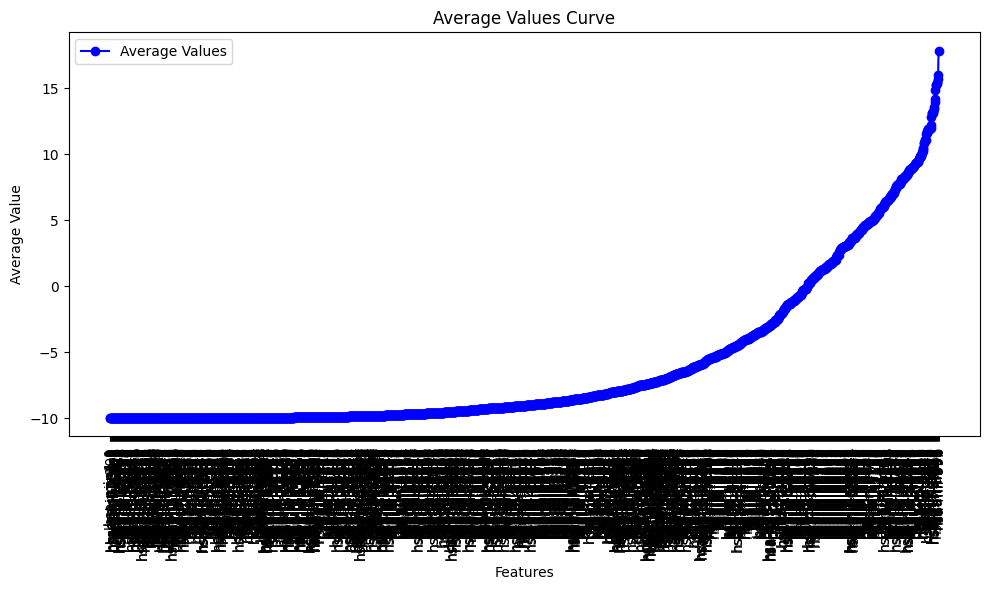

In [14]:
import matplotlib.pyplot as plt

dataset = pd.read_csv(os.path.join(DATA_PATH, 'clinical_miRNA_normalized_log.csv'))

# Funzione per creare un boxplot per ogni colonna
def plot_boxplots(dataframe, columns=[]):
    if len(columns) == 0:
        columns = dataframe.columns
    
    # Crea un unico grafico con tutti i boxplot affiancati
    fig, ax = plt.subplots(figsize=(len(columns) * 0.5, 6))  # Dimensione dinamica in base al numero di colonne
    dataframe[columns].boxplot(ax=ax, vert=True)
    
    # Aggiungi etichette e titolo
    ax.set_title("Scrollable Boxplots")
    ax.set_xlabel("Features")
    ax.set_ylabel("Values")
    
    # Ruota le etichette delle x per leggibilità
    plt.xticks(rotation=90)
    
    # Mostra il grafico
    plt.tight_layout()
    plt.show()

def plot_avg_curve(dataframe, columns=[]):
    if len(columns) == 0:
        columns = dataframe.columns
    # Calcola i valori medi per ogni colonna
    means = dataframe[columns].mean().sort_values()
    
    # Crea il grafico
    plt.figure(figsize=(10, 6))
    plt.plot(columns, means, marker='o', linestyle='-', color='b', label='Average Values')
    
    # Aggiungi etichette e titolo
    plt.title("Average Values Curve")
    plt.xlabel("Features")
    plt.ylabel("Average Value")
    plt.xticks(rotation=90)
    plt.legend()
    
    # Migliora il layout
    plt.tight_layout()
    plt.show()
    

# Chiamata alla funzione
# plot_boxplots(dataset, [col for col in dataset.columns if 'hsa-mir'  in col])
plot_avg_curve(dataset, [col for col in dataset.columns if 'hsa-mir'  in col])